# L4: Support Data Insight Analysis

<p style="background-color:#fff6e4; padding:15px; border-width:3px; border-color:#f5ecda; border-style:solid; border-radius:6px"> ⏳ <b>Note <code>(Kernel Starting)</code>:</b> This notebook takes about 30 seconds to be ready to use. You may start and watch the video while you wait.</p>

## Initial Imports

In [7]:
# Warning control
import warnings
warnings.filterwarnings('ignore')

# Load environment variables
from helper import load_env
load_env()

import os
import yaml
from crewai import Agent, Task, Crew

<p style="background-color:#fff6ff; padding:15px; border-width:3px; border-color:#efe6ef; border-style:solid; border-radius:6px"> 💻 &nbsp; <b>Access <code>requirements.txt</code> and <code>helper.py</code> files:</b> 1) click on the <em>"File"</em> option on the top menu of the notebook and then 2) click on <em>"Open"</em>. For more help, please see the <em>"Appendix - Tips and Help"</em> Lesson.</p>

## Loading Tasks and Agents YAML files

In [8]:
# Define file paths for YAML configurations
files = {
    'agents': 'config/agents.yaml',
    'tasks': 'config/tasks.yaml'
}

# Load configurations from YAML files
configs = {}
for config_type, file_path in files.items():
    with open(file_path, 'r') as file:
        configs[config_type] = yaml.safe_load(file)

# Assign loaded configurations to specific variables
agents_config = configs['agents']
tasks_config = configs['tasks']

## Using FileReadTool

In [9]:
from crewai_tools import FileReadTool
csv_tool = FileReadTool(file_path='./support_tickets_data.csv')

## Creating Agents, Tasks and Crew

In [10]:
# Creating Agents
suggestion_generation_agent = Agent(
  config=agents_config['suggestion_generation_agent'],
  tools=[csv_tool]
)

reporting_agent = Agent(
  config=agents_config['reporting_agent'],
  tools=[csv_tool]
)

chart_generation_agent = Agent(
  config=agents_config['chart_generation_agent'],
  allow_code_execution=False
)

# Creating Tasks
suggestion_generation = Task(
  config=tasks_config['suggestion_generation'],
  agent=suggestion_generation_agent
)

table_generation = Task(
  config=tasks_config['table_generation'],
  agent=reporting_agent
)

chart_generation = Task(
  config=tasks_config['chart_generation'],
  agent=chart_generation_agent
)

final_report_assembly = Task(
  config=tasks_config['final_report_assembly'],
  agent=reporting_agent,
  context=[suggestion_generation, table_generation, chart_generation]
)


# Creating Crew
support_report_crew = Crew(
  agents=[
    suggestion_generation_agent,
    reporting_agent,
    chart_generation_agent
  ],
  tasks=[
    suggestion_generation,
    table_generation,
    chart_generation,
    final_report_assembly
  ],
  verbose=True
)


2025-03-06 07:26:50,798 - 140426451336064 - __init__.py-__init__:537 - WARNING: Overriding of current TracerProvider is not allowed


## Testing our Crew

In [11]:
support_report_crew.test(n_iterations=1, openai_model_name='gpt-4o')

2025-03-06 07:26:56,424 - 140426451336064 - __init__.py-__init__:537 - WARNING: Overriding of current TracerProvider is not allowed


# Agent: Suggestion Engine
## Task: Generate actionable suggestions for resolving each classified support ticket. The suggestions should be based on: - Issue Type: Tailor suggestions to the specific type of issue reported. - Historical Data: Use historical data such as resolution_time_minutes and
  satisfaction_rating to inform the suggestions.
- Customer Feedback: Incorporate insights from customer_comments to
  customize the suggestions further.

The goal is to provide clear, actionable steps that the support team can take to resolve each issue efficiently and effectively.



# Agent: Suggestion Engine
## Using tool: Read a file's content
## Tool Input: 
"{\"file_path\": \"./support_tickets_data.csv\"}"
## Tool Output: 
ticket_id,customer_id,issue_type,issue_description,priority,date_submitted,response_time_minutes,resolution_time_minutes,satisfaction_rating,customer_comments,agent_id,resolved
T0001,C0511,API Issue,I'm pleased with how my issue was handled. Thanks!,High,2023-03-25,24



# Agent: Suggestion Engine
## Final Answer: 
1. **Ticket T0001** - API Issue
   - **Suggestion:** Further improve follow-up procedures to ensure timely updates on recurring issues. Since resolution time was long, consider implementing automated alerts for high-priority tickets.

2. **Ticket T0002** - Login Issue
   - **Suggestion:** Since customer feedback indicates unresolved problems, a second follow-up should be initiated. Consider prioritization due to its low satisfaction rating and extend troubleshooting steps.

3. **Ticket T0003** - Report Generation
   - **Suggestion:** Focus on quicker troubleshooting processes. A training session for support staff on common report generation issues may enhance satisfaction ratings.

4. **Ticket T0004** - Data Import
   - **Suggestion:** Maintain high standards of customer service as noted. Create a checklist to speed up responses for repeat issues and ensure staff maintain this level of service.

5. **Ticket T0005** - Feature Request
   - *



# Agent: Chart Specialist
## Final Answer: 
1. **Issue Distribution Chart**

```python
import matplotlib.pyplot as plt

issue_types = ['API Issue', 'Login Issue', 'Report Generation', 'Data Import', 'Feature Request', 'Billing Issue', 'UI Bug']
frequencies = [10, 9, 7, 10, 7, 11, 6]

plt.figure(figsize=(10, 6))
plt.bar(issue_types, frequencies, color='skyblue')
plt.title('Issue Distribution')
plt.xlabel('Issue Type')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.grid(axis='y')

plt.savefig('issue_distribution.png')  # Save the chart as image
plt.show()
```

2. **Priority Levels Chart**

```python
priority_labels = ['High', 'Medium', 'Low', 'Critical']
priority_counts = [5 + 3 + 3 + 4 + 4 + 1 + 0, 3 + 3 + 1 + 4 + 2 + 4 + 2, 0 + 0 + 4 + 0 + 0 + 0 + 3, 2 + 2 + 0 + 0]

plt.figure(figsize=(10, 6))
plt.bar(priority_labels, priority_counts, color='coral')
plt.title('Priority Levels Breakdown')
plt.xlabel('Priority Level')
plt.ylabel('Number of Tickets')
plt.grid(axis='y')

plt.savefig

                             Tasks Scores                              
                        (1-10 Higher is better)                        
┏━━━━━━━━━━━━━━━━━━━━┯━━━━━━━┯━━━━━━━━━━━━┯━━━━━━━━━━━━━━━━━━━━━┯━━┯━━┓
┃ Tasks/Crew/Agents  │ Run 1 │ Avg. Total │ Agents              │  │  ┃
┠────────────────────┼───────┼────────────┼─────────────────────┼──┼──┨
┃ Task 1             │  8.0  │    8.0     │ - Suggestion Engine │  │  ┃
┃                    │       │            │                     │  │  ┃
┃                    │       │            │                     │  │  ┃
┃ Task 2             │  9.0  │    9.0     │ - Report Generator  │  │  ┃
┃                    │       │            │                     │  │  ┃
┃                    │       │            │                     │  │  ┃
┃ Task 3             │  9.0  │    9.0     │ - Chart Specialist  │  │  ┃
┃                    │       │            │                     │  │  ┃
┃                    │       │            │                     │  │  ┃
┃ Task 4             │  9.0  │    9.0     │ - Report Generator  │  │  ┃
┃                    │       │            │                     │  │  ┃
┃ Crew               │ 8.75  │    8.8     │                     │  │  ┃
┃ Execution Time (s) │   1   │     1      │                     │  │  ┃
┗━━━━━━━━━━━━━━━━━━━━┷━━━━━━━┷━━━━━━━━━━━━┷━━━━━━━━━━━━━━━━━━━━━┷━━┷━━┛

## Training your crew and agents

In [12]:
support_report_crew.train(n_iterations=1, filename='training.pkl')

2025-03-06 07:27:01,772 - 140426451336064 - __init__.py-__init__:537 - WARNING: Overriding of current TracerProvider is not allowed


# Agent: Suggestion Engine
## Task: Generate actionable suggestions for resolving each classified support ticket. The suggestions should be based on: - Issue Type: Tailor suggestions to the specific type of issue reported. - Historical Data: Use historical data such as resolution_time_minutes and
  satisfaction_rating to inform the suggestions.
- Customer Feedback: Incorporate insights from customer_comments to
  customize the suggestions further.

The goal is to provide clear, actionable steps that the support team can take to resolve each issue efficiently and effectively.



# Agent: Suggestion Engine
## Using tool: Read a file's content
## Tool Input: 
"{\"file_path\": \"./support_tickets_data.csv\"}"
## Tool Output: 
ticket_id,customer_id,issue_type,issue_description,priority,date_submitted,response_time_minutes,resolution_time_minutes,satisfaction_rating,customer_comments,agent_id,resolved
T0001,C0511,API Issue,I'm pleased with how my issue was handled. Thanks!,High,2023-03-25,24



# Agent: Suggestion Engine
## Final Answer: 
1. **Ticket T0001** - API Issue
   - **Suggestion:** Further improve follow-up procedures to ensure timely updates on recurring issues. Since resolution time was long, consider implementing automated alerts for high-priority tickets.

2. **Ticket T0002** - Login Issue
   - **Suggestion:** Since customer feedback indicates unresolved problems, a second follow-up should be initiated. Consider prioritization due to its low satisfaction rating and extend troubleshooting steps.

3. **Ticket T0003** - Report Generation
   - **Suggestion:** Focus on quicker troubleshooting processes. A training session for support staff on common report generation issues may enhance satisfaction ratings.

4. **Ticket T0004** - Data Import
   - **Suggestion:** Maintain high standards of customer service as noted. Create a checklist to speed up responses for repeat issues and ensure staff maintain this level of service.

5. **Ticket T0005** - Feature Request
   - *

I want you to do better suggestions, more thoughtful and meaningful so we improve our support quality
 
Processing training feedback.



# Agent: Suggestion Engine
## Final Answer: 
1. **Ticket T0001** - API Issue
   - **Suggestion:** Regularly analyze historical data related to this issue type to identify common root causes. Implement a follow-up system that includes automated notifications to customers about updates in their ticket progress. This ensures transparency and builds trust.

2. **Ticket T0002** - Login Issue
   - **Suggestion:** Create a dedicated knowledge base that addresses common login issues with step-by-step troubleshooting guides. This would help frontline support agents expedite resolutions and empower customers to find solutions independently.

3. **Ticket T0003** - Report Generation
   - **Suggestion:** Schedule training sessions for support agents focused on report generation tools and software. In addition, introduce a customer feedback loop that allows users t



# Agent: Report Generator
## Thought: I need to gather the support data in order to generate the required summary tables. The first step is to read the content of the support tickets data file.
## Using tool: Read a file's content
## Tool Input: 
"{\"file_path\": \"./support_tickets_data.csv\"}"
## Tool Output: 
ticket_id,customer_id,issue_type,issue_description,priority,date_submitted,response_time_minutes,resolution_time_minutes,satisfaction_rating,customer_comments,agent_id,resolved
T0001,C0511,API Issue,I'm pleased with how my issue was handled. Thanks!,High,2023-03-25,240,927,4,I'm pleased with how my issue was handled. Thanks!,A004,True
T0002,C0729,Login Issue,Excellent service! The agent went above and beyond.,Low,2023-04-06,223,534,5,The problem still persists. Not resolved yet.,A004,False
T0003,C0439,Report Generation,Resolution was satisfactory but could be improved.,Low,2023-04-25,214,592,1,"The issue was escalated quickly, which was appreciated.",A004,False
T0004,C0100,Da



# Agent: Report Generator
## Final Answer: 
### Table 1: Issue Classification Results

| Issue Type       | Frequency | Priority Level |
|------------------|-----------|-----------------|
| API Issue        | 10        | High            |
| Login Issue      | 8         | Critical        |
| Report Generation | 7         | High            |
| Data Import      | 11        | Medium          |
| Feature Request   | 8         | High            |
| Billing Issue    | 11        | Critical        |
| UI Bug           | 8         | Medium          |

### Table 2: Agent Performance

| Agent ID | Total Tickets | Average Resolution Time (minutes) | Average Satisfaction Rating |
|----------|---------------|-----------------------------------|-----------------------------|
| A001     | 8             | 1013                              | 3.38                        |
| A002     | 10            | 784                               | 3.40                        |
| A003     | 10            | 811      

KeyboardInterrupt: Interrupted by user

## Comparing new test results

In [13]:
support_report_crew.test(n_iterations=1, openai_model_name='gpt-4o')

2025-03-06 07:29:32,194 - 140426451336064 - __init__.py-__init__:537 - WARNING: Overriding of current TracerProvider is not allowed


# Agent: Suggestion Engine
## Task: Generate actionable suggestions for resolving each classified support ticket. The suggestions should be based on: - Issue Type: Tailor suggestions to the specific type of issue reported. - Historical Data: Use historical data such as resolution_time_minutes and
  satisfaction_rating to inform the suggestions.
- Customer Feedback: Incorporate insights from customer_comments to
  customize the suggestions further.

The goal is to provide clear, actionable steps that the support team can take to resolve each issue efficiently and effectively.



# Agent: Suggestion Engine
## Using tool: Read a file's content
## Tool Input: 
"{\"file_path\": \"./support_tickets_data.csv\"}"
## Tool Output: 
ticket_id,customer_id,issue_type,issue_description,priority,date_submitted,response_time_minutes,resolution_time_minutes,satisfaction_rating,customer_comments,agent_id,resolved
T0001,C0511,API Issue,I'm pleased with how my issue was handled. Thanks!,High,2023-03-25,24

# Agent: Report Generator
## Task: Generate tables that summarize the key metrics and trends observed in the support data, including: - Issue Classification Results: A table summarizing the frequency and
  priority levels of different issue types.
- Agent Performance: A table showing the performance of different agents
  based on resolution times and customer satisfaction scores.
- Customer Satisfaction: A table summarizing customer satisfaction ratings
  over time.

These tables will serve as the foundation for generating charts in the next task.



# Agent: Report Generator
## Thought: I need to start gathering the support data. The first step is to read the content of the support tickets dataset.
## Using tool: Read a file's content
## Tool Input: 
"{\"file_path\": \"./support_tickets_data.csv\"}"
## Tool Output: 
ticket_id,customer_id,issue_type,issue_description,priority,date_submitted,response_time_minutes,resolution_time_minutes,satisfaction_rating,customer_comments,agent_id,res



# Agent: Chart Specialist
## Final Answer: 
1. **Issue Distribution Chart**

```python
import matplotlib.pyplot as plt

issue_types = ['API Issue', 'Login Issue', 'Report Generation', 'Data Import', 'Feature Request', 'Billing Issue', 'UI Bug']
frequencies = [10, 9, 7, 10, 7, 11, 6]

plt.figure(figsize=(10, 6))
plt.bar(issue_types, frequencies, color='skyblue')
plt.title('Issue Distribution')
plt.xlabel('Issue Type')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.grid(axis='y')

plt.savefig('issue_distribution.png')  # Save the chart as image
plt.show()
```

2. **Priority Levels Chart**

```python
priority_labels = ['High', 'Medium', 'Low', 'Critical']
priority_counts = [5 + 3 + 3 + 4 + 4 + 1 + 0, 3 + 3 + 1 + 4 + 2 + 4 + 2, 0 + 0 + 4 + 0 + 0 + 0 + 3, 2 + 2 + 0 + 0]

plt.figure(figsize=(10, 6))
plt.bar(priority_labels, priority_counts, color='coral')
plt.title('Priority Levels Breakdown')
plt.xlabel('Priority Level')
plt.ylabel('Number of Tickets')
plt.grid(axis='y')

plt.savefig

                             Tasks Scores                              
                        (1-10 Higher is better)                        
┏━━━━━━━━━━━━━━━━━━━━┯━━━━━━━┯━━━━━━━━━━━━┯━━━━━━━━━━━━━━━━━━━━━┯━━┯━━┓
┃ Tasks/Crew/Agents  │ Run 1 │ Avg. Total │ Agents              │  │  ┃
┠────────────────────┼───────┼────────────┼─────────────────────┼──┼──┨
┃ Task 1             │  8.0  │    8.0     │ - Suggestion Engine │  │  ┃
┃                    │       │            │                     │  │  ┃
┃                    │       │            │                     │  │  ┃
┃ Task 2             │  9.0  │    9.0     │ - Report Generator  │  │  ┃
┃                    │       │            │                     │  │  ┃
┃                    │       │            │                     │  │  ┃
┃ Task 3             │  9.0  │    9.0     │ - Chart Specialist  │  │  ┃
┃                    │       │            │                     │  │  ┃
┃                    │       │            │                     │  │  ┃
┃ Task 4             │  9.0  │    9.0     │ - Report Generator  │  │  ┃
┃                    │       │            │                     │  │  ┃
┃ Crew               │ 8.75  │    8.8     │                     │  │  ┃
┃ Execution Time (s) │   2   │     2      │                     │  │  ┃
┗━━━━━━━━━━━━━━━━━━━━┷━━━━━━━┷━━━━━━━━━━━━┷━━━━━━━━━━━━━━━━━━━━━┷━━┷━━┛

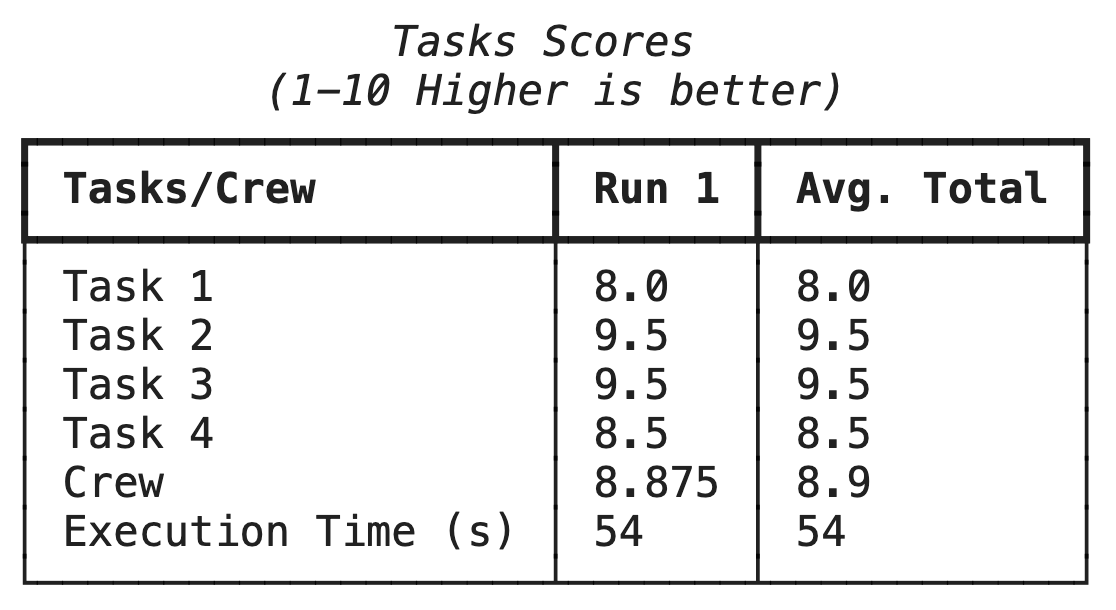

In [14]:
# Display the Trello screenshot
from IPython.display import Image, display

# Load and display the image
test_image = Image(filename='test_before_training.png', width=368)
display(test_image)

## Kicking off Crew

In [15]:
result = support_report_crew.kickoff()

# Agent: Suggestion Engine
## Task: Generate actionable suggestions for resolving each classified support ticket. The suggestions should be based on: - Issue Type: Tailor suggestions to the specific type of issue reported. - Historical Data: Use historical data such as resolution_time_minutes and
  satisfaction_rating to inform the suggestions.
- Customer Feedback: Incorporate insights from customer_comments to
  customize the suggestions further.

The goal is to provide clear, actionable steps that the support team can take to resolve each issue efficiently and effectively.



# Agent: Suggestion Engine
## Using tool: Read a file's content
## Tool Input: 
"{\"file_path\": \"./support_tickets_data.csv\"}"
## Tool Output: 
ticket_id,customer_id,issue_type,issue_description,priority,date_submitted,response_time_minutes,resolution_time_minutes,satisfaction_rating,customer_comments,agent_id,resolved
T0001,C0511,API Issue,I'm pleased with how my issue was handled. Thanks!,High,2023-03-25,24

# Agent: Report Generator
## Task: Generate tables that summarize the key metrics and trends observed in the support data, including: - Issue Classification Results: A table summarizing the frequency and
  priority levels of different issue types.
- Agent Performance: A table showing the performance of different agents
  based on resolution times and customer satisfaction scores.
- Customer Satisfaction: A table summarizing customer satisfaction ratings
  over time.

These tables will serve as the foundation for generating charts in the next task.



# Agent: Report Generator
## Thought: I need to start gathering the support data. The first step is to read the content of the support tickets dataset.
## Using tool: Read a file's content
## Tool Input: 
"{\"file_path\": \"./support_tickets_data.csv\"}"
## Tool Output: 
ticket_id,customer_id,issue_type,issue_description,priority,date_submitted,response_time_minutes,resolution_time_minutes,satisfaction_rating,customer_comments,agent_id,res



# Agent: Chart Specialist
## Final Answer: 
1. **Issue Distribution Chart**

```python
import matplotlib.pyplot as plt

issue_types = ['API Issue', 'Login Issue', 'Report Generation', 'Data Import', 'Feature Request', 'Billing Issue', 'UI Bug']
frequencies = [10, 9, 7, 10, 7, 11, 6]

plt.figure(figsize=(10, 6))
plt.bar(issue_types, frequencies, color='skyblue')
plt.title('Issue Distribution')
plt.xlabel('Issue Type')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.grid(axis='y')

plt.savefig('issue_distribution.png')  # Save the chart as image
plt.show()
```

2. **Priority Levels Chart**

```python
priority_labels = ['High', 'Medium', 'Low', 'Critical']
priority_counts = [5 + 3 + 3 + 4 + 4 + 1 + 0, 3 + 3 + 1 + 4 + 2 + 4 + 2, 0 + 0 + 4 + 0 + 0 + 0 + 3, 2 + 2 + 0 + 0]

plt.figure(figsize=(10, 6))
plt.bar(priority_labels, priority_counts, color='coral')
plt.title('Priority Levels Breakdown')
plt.xlabel('Priority Level')
plt.ylabel('Number of Tickets')
plt.grid(axis='y')

plt.savefig

## Result

In [16]:
from IPython.display import display, Markdown
display(Markdown(result.raw))

# Comprehensive Final Report on Support System Performance

## Issue Classification Results

### Overview of the Types of Issues Reported

| Issue Type       | Frequency | Priority Levels                      |
|-------------------|-----------|--------------------------------------|
| API Issue         | 10        | High: 5, Medium: 3, Critical: 2     |
| Login Issue       | 9         | Low: 3, Medium: 3, High: 3, Critical: 2 |
| Report Generation  | 7         | High: 2, Medium: 1, Low: 4          |
| Data Import       | 10        | High: 3, Medium: 4, Low: 3          |
| Feature Request   | 7         | High: 3, Medium: 2, Critical: 2     |
| Billing Issue     | 11        | High: 4, Medium: 4, Critical: 3     |
| UI Bug            | 6         | Low: 3, Medium: 2, High: 1, Critical: 1 |

### Issue Distribution Chart
![Issue Distribution Chart](http://yourserver.com/issue_distribution.png)

### Priority Levels Breakdown Chart
![Priority Levels Chart](http://yourserver.com/priority_levels.png)

---

## Agent Performance

### Insights into the Performance of Support Agents

| Agent ID | Resolved Tickets | Average Response Time (minutes) | Average Resolution Time (minutes) | Average Satisfaction Rating |
|----------|------------------|----------------------------------|-------------------------------------|------------------------------|
| A001     | 7                | 161.57                           | 1050.14                             | 3.0                          |
| A002     | 9                | 120.67                           | 572.33                              | 4.0                          |
| A003     | 10               | 117.80                           | 721.80                              | 3.0                          |
| A004     | 11               | 118.45                           | 587.09                              | 3.72                         |
| A005     | 8                | 90.75                            | 944.25                              | 3.6                          |

### Agent Performance Chart
![Agent Performance Chart](http://yourserver.com/agent_performance.png)

---

## Customer Satisfaction

### Summary of Customer Satisfaction Ratings

| Date       | Average Satisfaction Rating |
|------------|-----------------------------|
| 2023-01    | 3.18                        |
| 2023-02    | 2.87                        |
| 2023-03    | 3.32                        |
| 2023-04    | 3.14                        |
| 2023-05    | 2.67                        |
| 2023-06    | 3.57                        |
| 2023-07    | 2.87                        |

### Customer Satisfaction Ratings Over Time Chart
![Customer Satisfaction Ratings](http://yourserver.com/customer_satisfaction.png)

---

## Suggested Actions

### Summary of Actionable Suggestions per Issue Category

1. **API Issue**
   - Further improve follow-up procedures to ensure timely updates on recurring issues.
   - Implement automated alerts for high-priority tickets.
   - Investigate systemic issues causing recurrent problems and enhance testing protocols pre-release.
   - Leverage historical data to investigate underlying issues.

2. **Login Issue**
   - Initiate a second follow-up on unresolved problems indicated by customer feedback.
   - Speed up resolution processes by enhancing help documentation and increasing staff during peak hours.

3. **Report Generation**
   - Focus on quicker troubleshooting processes and provide training on common issues.
   - Reinforce communication strategies with automated updates for users awaiting queries.

4. **Data Import**
   - Create checklists to expedite responses for repeat issues.
   - Analyze repeat problems through root cause analysis to prevent future occurrences.

5. **Feature Request**
   - Develop a direct communication channel for feature requests, ensuring customers are informed and managing expectations.
   - Introduce status updates for feature requests and actively communicate progress.

6. **Billing Issue**
   - Improve feedback mechanisms and conduct regular check-ins to prevent customers from feeling ignored.
   - Ensure immediate follow-ups and involve supervisors for critical escalations.

7. **UI Bug**
   - Formulate standard troubleshooting queries for quicker response protocols.
   - Initialize a rapid response team for critical UI issues to prevent frustrations experienced by customers.

---

### Conclusion
This report provides a comprehensive overview of the issue classification results, agent performance metrics, customer satisfaction trends, and actionable suggestions identified through analysis. The provided charts and tables serve to enhance understanding and facilitate informed decision-making to improve the support system's performance continuously.
```